# Miami Heat Playoff Game Predictor
# (With multiple models)

This workbook contains code used to create 3 seperate models. The dataset in use is an excel document that I created with real playoff data from the 2020-2023 post_season.

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from IPython.display import display
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, accuracy_score
import warnings; warnings.simplefilter("ignore")

Load Dataset and enumerate columns for visualization and feature selection

In [6]:
df = pd.read_csv("Miami_Heat_Playoff_Data_csv.csv")

game_num_encoded = pd.get_dummies(df["game_num"], prefix="game")

# Add the encoded columns to the original DataFrame
df = pd.concat([df, game_num_encoded], axis=1)


for i, col in enumerate(df.columns):
    print(f"{i}: {col}")
    
print(len(df))
display(df.head())

0: Year
1: game_num
2: heat_top_3_pts
3: opponent_top_3_pts
4: heat_pts
5: opponent_pts
6: Spread
7: heat_fg_perc
8: opponent_fg_pct
9: heat_3pt_perc
10: opponent_3pt_perc
11: heat_ft_perc
12: opponent_ft_perc
13: heat_off_reb
14: opponent_off_reb
15: heat_def_reb
16: opponent_def_reb
17: heat_assists
18: opponent_assists
19: heat_blocks
20: opponent_blocks
21: heat_steals
22: opponent_steals
23: heat_turnovers
24: opponent_turnovers
25: heat_pts_paint
26: opponent_pts_paint
27: heat_fouls
28: opponent_fouls
29: location
30: heat_rest_days
31: time
32: opponent_rest_days
33: heat_num_injuries
34: heat_signif_injuries
35: opponent_num_injuries
36: opponent_signif_injuries
37: heat_winning_streak
38: opponent_winning_streak
39: opponent
40: win_rank
41: pts_rank
42: reb_rank
43: ast_rank
44: plus_minus_rank
45: opponent_team_rank
46: opp_mov_avg
47: heat_win_rank
48: heat_pts_rank
49: heat_reb_rank
50: heat_ast_rank
51: heat_plus_minus_rank
52: heat_team_rank
53: heat_mov_avg
54: diff_mo

,Year,game_num,heat_top_3_pts,opponent_top_3_pts,heat_pts,opponent_pts,Spread,heat_fg_perc,opponent_fg_pct,heat_3pt_perc,...,heat_mov_avg,diff_mov,won,game_1,game_2,game_3,game_4,game_5,game_6,game_7
0,2023,1,75,70,130,117,13,59.5,49.5,60.0,...,82.400000,-14.450000,1,1,0,0,0,0,0,0
1,2023,2,59,71,122,138,-16,53.6,53.5,44.4,...,90.300000,-6.575000,0,0,1,0,0,0,0,0
2,2023,3,65,56,121,99,22,53.6,44.7,48.5,...,92.216667,-4.583333,1,0,0,1,0,0,0,0
3,2023,4,83,76,119,114,5,49.4,43.3,40.6,...,93.287500,-2.875000,1,0,0,0,1,0,0,0
4,2023,5,84,89,128,126,2,45.5,46.2,37.8,...,94.010000,-1.760000,1,0,0,0,0,1,0,0


The First model I train is a Logistic Regression Model and obtains an accuracy of approx. 0.62.

In [12]:

y = df.won
known_x = df[["location", "heat_rest_days", "opponent_rest_days", "heat_num_injuries", "heat_signif_injuries", "opponent_num_injuries", "opponent_signif_injuries", "heat_winning_streak", "opponent_winning_streak", "diff_mov"]]
X_train, X_test, y_train, y_test = train_test_split(known_x, y, test_size = 0.3, random_state = 1)


lr1 = LogisticRegression(max_iter = 1000)
lr1.fit(X_train, y_train)
y_pred = lr1.predict(X_test)

print("Accuracy Score: ", lr1.score(X_test, y_test))
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))
print("F1 Score: ", f1_score(y_test, y_pred))
print("Recall Score: ", recall_score(y_test, y_pred))
print("Precision Score: ", precision_score(y_test, y_pred))

inputs = [[0, 2, 2, 1, 1, 0, 0, 1, 7, -2.1]]
predicted_outcome = lr1.predict(inputs)
if predicted_outcome == 1:
    predicted_outcome = "win"
else:
    predicted_outcome = "lose"

print("game prediction:" + f"{predicted_outcome}")
print(lr1.predict_proba(inputs))


Accuracy Score:  0.6190476190476191
Confusion Matrix: 
 [[5 5]
 [3 8]]
F1 Score:  0.6666666666666667
Recall Score:  0.7272727272727273
Precision Score:  0.6153846153846154
game prediction:lose
[[0.5706002 0.4293998]]


The Next Model is a Decision Tree Classifier with an accuracy of approx 0.62. It is nice to have multiple models to base predictions on.

In [20]:
known_x_dt = df[["location", "heat_rest_days", "opponent_rest_days", "heat_num_injuries", "heat_signif_injuries", "opponent_num_injuries", "opponent_signif_injuries", "heat_winning_streak", "opponent_winning_streak",  "diff_mov"]]
X_train, X_test, y_train, y_test = train_test_split(known_x_dt, y, test_size = 0.5, random_state = 42)


dtc_inputs = [[0, 3, 3, 1, 1, 0, 0, 1, 7, -3.1]]
dtc = DecisionTreeClassifier(max_depth = 3)
dtc.fit(X_train, y_train)
y_pred1 = dtc.predict(X_test)

predicted_outcome = dtc.predict(dtc_inputs)
predicted_outcome = dtc.predict(dtc_inputs)
if predicted_outcome == 1:
    predicted_outcome = "win"
else:
    predicted_outcome = "lose"

print("game prediction:" + f"{predicted_outcome}")




print("Accuracy Score: ", dtc.score(X_test, y_test))
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred1))
print("F1 Score: ", f1_score(y_test, y_pred1))
print("Recall Score: ", recall_score(y_test, y_pred1))
print("Precision Score: ", precision_score(y_test, y_pred1))

game prediction:lose
Accuracy Score:  0.6176470588235294
Confusion Matrix: 
 [[ 4 11]
 [ 2 17]]
F1 Score:  0.7234042553191489
Recall Score:  0.8947368421052632
Precision Score:  0.6071428571428571


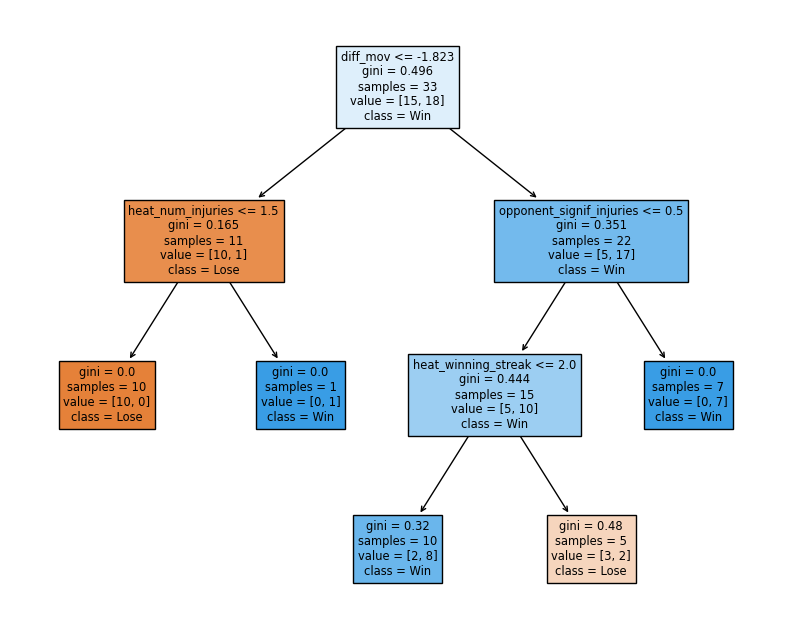

In [21]:
plt.figure(figsize=(10, 8))
plot_tree(dtc, filled=True, feature_names=X_train.columns, class_names=["Lose", "Win"])
plt.show()

Lastly, a Random Forest Classifier with a 0.58 accuracy!

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier



# Create the random forest classifier with the decision tree classifier as the base estimator
rfc = RandomForestClassifier(n_estimators=10, max_depth = 3, random_state = 42)

# Train the random forest classifier
rfc.fit(X_train, y_train)

# Make predictions on the test set
y_pred2 = rfc.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred2)
print("Accuracy:", accuracy)


predicted_outcome = rfc.predict(dtc_inputs)
predicted_outcome = rfc.predict(dtc_inputs)
if predicted_outcome == 1:
    predicted_outcome = "win"
else:
    predicted_outcome = "lose"

print("game prediction:" + f"{predicted_outcome}")
y_pred2 = rfc.predict(X_test)


print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred2))
print("F1 Score: ", f1_score(y_test, y_pred2))
print("Recall Score: ", recall_score(y_test, y_pred2))
print("Precision Score: ", precision_score(y_test, y_pred2))

Accuracy: 0.5882352941176471
game prediction:lose
Confusion Matrix: 
 [[ 5 10]
 [ 4 15]]
F1 Score:  0.6818181818181819
Recall Score:  0.7894736842105263
Precision Score:  0.6
